# lab 1

In [15]:
import os
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2


In [16]:
def bw_0(filename):
    img = mpimg.imread(filename)
    arr = img.mean(axis=-1)
    plt.imshow(arr, cmap=plt.get_cmap('gray'))
    plt.show()
    return img

In [17]:
def bw(filename):

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    thresholdValue = np.mean(image)
    xDim, yDim = image.shape

    for i in range(xDim):
        for j in range(yDim):
            if image[i][j] > thresholdValue:
                image[i][j] = 255  
            else:
                image[i][j] = 0    

    # cv2.imshow('Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
   
    plt.imshow(image, cmap='gray')
    plt.show()
    return image



In [18]:
def otsu(image):
    height, width = image.shape
    hist = np.zeros(256)

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            hist[pixel_value] += 1

    total_pixels = height * width
    p = hist / total_pixels

    max_variance = 0
    optimal_threshold = 0

    for a in range(256):
        q1 = sum(p[:a])
        q2 = sum(p[a:])

        if q1 == 0 or q2 == 0:
            continue

        mean1 = sum([x * p[x] for x in range(a)]) / q1
        mean2 = sum([x * p[x] for x in range(a, 256)]) / q2

        var1 = sum([((x - mean1) ** 2) * p[x] for x in range(a)]) / q1
        var2 = sum([((x - mean2) ** 2) * p[x] for x in range(a, 256)]) / q2

        result = q1 * var1 + q2 * var2

        if result > max_variance:
            max_variance = result
            optimal_threshold = a
            
    return optimal_threshold





In [31]:

def objectImage(image2, filename):

    original_image = cv2.imread(filename)
    optimal_threshold = otsu(image2)

    _, mask = cv2.threshold(image2, optimal_threshold, 255, cv2.THRESH_BINARY)

    inverted_mask = cv2.bitwise_not(mask)

    image_with_alpha = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)

    image_with_alpha[:, :, 3] = inverted_mask

    cv2.imwrite('object_' + filename, image_with_alpha)
    
    cv2.imshow('Mask', mask)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


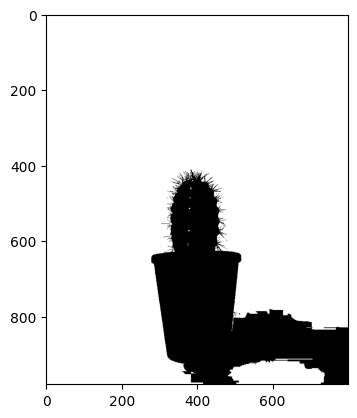

In [32]:
filename = "before/lab1_foto2.png"
bw_image = bw(filename)

objectImage(bw_image, filename)
